# OCR Optic Character Recognition
Буюу зурагнаас дүрс илрүүлэх аргууд энэхүү сэдвийн доор хамаарагддаг бөгөөд энэхүү лабораторын ажилаар бидний амьдралд өдөр тутамд хэрэглэгддэг асуудал болох баримт бичгийн зурагнаас текст олборлох даалгаврыг зурагын боловсруулалтын "Image Acquisition" ашиглан шийдвэрлэх болно.

# Хүрэх үр дүн
1. Математикийн ойлголтыг дүрс боловсруулалтад хэрэглэх; A
2. Зургийн боловсруулалтын хэрэгсэлүүдийг онцлог домайнд хэрхэн хэрэгжүүлэх ойлголт авах, тайлбарлах B
3. Практик асуудлыг шийдвэрлэхийн тулд алгоритмыг төлөвлөх, хэрэгжүүлэх замаар дүрс боловсруулалтын мэдлэгийг харуулах I
4. Дүрс боловсруулалтын чиглэлээр хийгдэж байгаа шинэ судалгааны ажлуудтай танилцах, мэдэх J
5. Зураг боловсруулах сантай ажиллан зураг боловсруулах чадвартай болно A
7. Бие даан туршилт судалгаан дээр суурилсан өгүүлэл бичих ба үр дүн гарган
авна. J

[Tesseract github](https://github.com/tesseract-ocr/tesseract)

In [1]:
!apt update
!add-apt-repository ppa:alex-p/tesseract-ocr-devel
!apt install -y tesseract-ocr-mon

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:5 http://ppa.launchpad.net/alex-p/tesseract-ocr-devel/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:14 h

In [2]:
!pip install --upgrade Pillow
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!tesseract --list-langs

List of available languages in "/usr/share/tesseract-ocr/5/tessdata/" (3):
eng
mon
osd


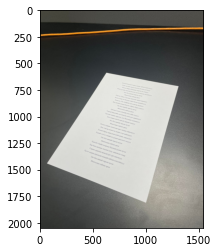

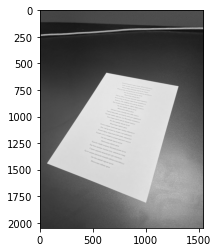

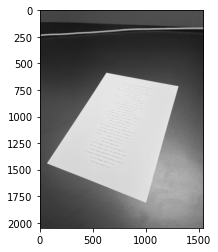

In [4]:
import cv2
#from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import pytesseract
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
#read image
img = cv2.imread('minii_nutag2.jpg')
# get grayscale image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.show()
#noise removal
noise=cv2.medianBlur(gray,7)
plt.imshow(cv2.cvtColor(noise, cv2.COLOR_BGR2RGB))
plt.show()
# thresholding# converting it to binary image by Thresholding
# this step is require if you have colored image because if you skip this part
# then tesseract won’t able to detect text correctly and this will give incorrect #result


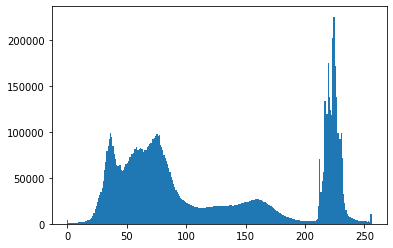

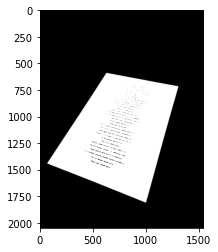

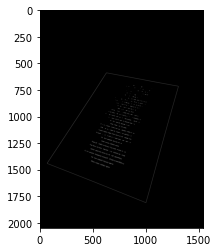

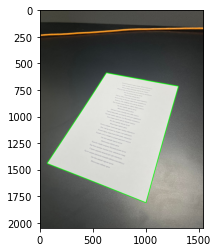

In [5]:
import numpy as np
hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.hist(img.ravel(),256,[0,256]); plt.show()

thresh = cv2.threshold(noise, 200, 255, 0)[1]
edged = cv2.Canny(thresh, 1500, 100)
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#Configuration
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
plt.show()

cv2.drawContours(img, contours, -1, (0, 255, 0), 5)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

config = ('-l mon — oem 3 — psm 3')
# pytessercat
text = pytesseract.image_to_string(thresh,config=config)
print(text)



(4, 2)


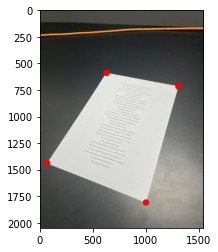

In [6]:

img = cv2.imread('minii_nutag2.jpg')

perim = cv2.arcLength(contours[0], True)
# setting the precision
epsilon = 0.02*perim

approxCorners = cv2.approxPolyDP(contours[0], epsilon, True)
corners = np.array(approxCorners).reshape(4,2)
print(corners.shape)
for point in corners:
  cv2.circle(img, (point[0], point[1]), 30, (0,0,255), -1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

(1536, 2048, 3)
[[ 623.  590.]
 [1296.  718.]
 [  67. 1439.]
 [ 992. 1808.]]
[[   0.    0.]
 [1536.    0.]
 [   0. 2048.]
 [1536. 2048.]]


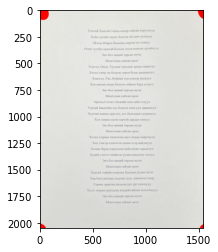

In [7]:
wrapped_img = np.zeros((img.shape[1], img.shape[0], 3))
print(wrapped_img.shape)
dst = np.float32(np.array([[0,0], [wrapped_img.shape[0], 0], [0,wrapped_img.shape[1]], [wrapped_img.shape[0], wrapped_img.shape[1]]]))
src = np.array([corners[0], corners[3], corners[1], corners[2]])
src = np.float32(src)
print(src)
print(dst)

matrix = cv2.getPerspectiveTransform(src, dst)
result = cv2.warpPerspective(img, matrix, (wrapped_img.shape[0], wrapped_img.shape[1]))

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()


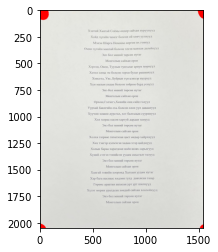

In [8]:
# thresh = cv2.threshold(result, 200, 255, 0)[1]
# edged = cv2.Canny(thresh, 50, 100)
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=result, ddepth=-1, kernel=kernel)
plt.imshow(cv2.cvtColor(image_sharp, cv2.COLOR_BGR2RGB))
cv2.imwrite('minii_nutag2_result.jpg', image_sharp)
plt.show()

In [9]:
text = pytesseract.image_to_string(image_sharp,config=config)
print(text)

Хэнтий Хангай Соёны өндөр сайхан нуруунууд
Хойд зүгийн чимэг болсон ой хөвч уулнууд
Мэнэн Шарга Номины өөргөн их гоянуд
Өмнө зүгийн манлай болсон элсэн манхан далайнууд
Энэ бол миний торсон нутаг
Монголын сайхан орон
Хэрлэн, Опон, Туулын тунгалаг ариун мөрнүүд
Хотол олны эм болсон горхи булаг рашаанууд
Хөвсгөл, Увс, Буйрын гүн цэнхэр нууруул
Хүн малын ундаа болсон тойром бүрд уснууд
Энэ бол миний төрсөн нутаг
Монголын сайхан орон
Орхон,Сэлэнгэ,Хөхийн онц сайн голууд
Уурхай баялгийн охь болсон олон уул даваанууд
Хуучин хөшөө дурсгал, хот балгадын сууринууд
Хол газраа одсон харгуй дардан замууд
Энэ бол миний төрсөн нутаг
Монголын сайхан орон
Холхи газраас гялалзсан цаст өндөр хайрхнууд
Хөх тэнгэр цэлмэсэн хөдөө хээр цайдмууд
Холын бараа харагдсан ноён шовх сарьдгууд
Хүний сэтгэл тэнийсэн уудам амьсгалт талууд
Энэ бол миний төрсөн нутаг
Монголын сайхан орон
Хангай говийн хооронд Халхын уудам нутаг
Хар бага наснаас хөдлөн гулд давхисан газар
Гөрөөс араатан авласан урт урт шилнүүд
Хүлэг мор

In [10]:
target_text = """
Хэнтий Хангай Соёны өндөр сайхан нуруунууд
Хойд зүгийн чимэг болсон ой хөвч уулнууд
Мэнэн Шарга Номины өөргөн их говиуд
Өмнө зүгийн манлай болсон элсэн манхан далайнууд
Энэ бол миний төрсөн нутаг
Монголын сайхан орон
Хэрлэн,Онон,Туулын тунгалаг ариун мөрнүүд
Хотол олны эм болсон горхи булаг рашаанууд
Хөвсгөл,Увс,Буйрын гүн цэнхэр нуурууд
Хүн малын ундаа болсон тойром бүрд уснууд
Энэ бол миний төрсөн нутаг
Монголын сайхан орон
Орхон,Сэлэнгэ,Хөхийн онц сайн голууд
Уурхай баялгийн охь болсон олон уул даваанууд
Хуучин хөшөө дурсгал,хот балгадын сууринууд
Хол газраа одсон харгуй дардан замууд
Энэ бол миний төрсөн нутаг
Монголын сайхан орон
Холхи газраас гялалзсан цаст өндөр хайрхнууд
Хөх тэнгэр цэлмэсэн хөдөө хээр цайдмууд
Холын бараа харагдсан ноён шовх сарьдгууд
Хүний сэтгэл тэнийсэн уудам амьсгалт талууд
Энэ бол миний төрсөн нутаг
Монголын сайхан орон
Хангай говийн хооронд Халхын уудам нутаг
Хар бага наснаас хөдлөн гулд  давхисан газар
Гөрөөс араатан авласан урт урт шилнүүд
Хүлэг морин уралдсан хөндий сайхан хоолойнууд
Энэ бол миний төрсөн нутаг
Монголын сайхан орон
"""

In [11]:
target_text1 = target_text.replace("\n", " ")
target_text1 = target_text1.replace(",", " ").lower().split(" ")

In [12]:
target_text1[:10]

['',
 'хэнтий',
 'хангай',
 'соёны',
 'өндөр',
 'сайхан',
 'нуруунууд',
 'хойд',
 'зүгийн',
 'чимэг']

In [13]:
text = text.replace("\n", " ")
text = text.replace(",", " ").lower().split(" ")
print(text)

['хэнтий', 'хангай', 'соёны', 'өндөр', 'сайхан', 'нуруунууд', 'хойд', 'зүгийн', 'чимэг', 'болсон', 'ой', 'хөвч', 'уулнууд', 'мэнэн', 'шарга', 'номины', 'өөргөн', 'их', 'гоянуд', 'өмнө', 'зүгийн', 'манлай', 'болсон', 'элсэн', 'манхан', 'далайнууд', 'энэ', 'бол', 'миний', 'торсон', 'нутаг', 'монголын', 'сайхан', 'орон', 'хэрлэн', '', 'опон', '', 'туулын', 'тунгалаг', 'ариун', 'мөрнүүд', 'хотол', 'олны', 'эм', 'болсон', 'горхи', 'булаг', 'рашаанууд', 'хөвсгөл', '', 'увс', '', 'буйрын', 'гүн', 'цэнхэр', 'нууруул', 'хүн', 'малын', 'ундаа', 'болсон', 'тойром', 'бүрд', 'уснууд', 'энэ', 'бол', 'миний', 'төрсөн', 'нутаг', 'монголын', 'сайхан', 'орон', 'орхон', 'сэлэнгэ', 'хөхийн', 'онц', 'сайн', 'голууд', 'уурхай', 'баялгийн', 'охь', 'болсон', 'олон', 'уул', 'даваанууд', 'хуучин', 'хөшөө', 'дурсгал', '', 'хот', 'балгадын', 'сууринууд', 'хол', 'газраа', 'одсон', 'харгуй', 'дардан', 'замууд', 'энэ', 'бол', 'миний', 'төрсөн', 'нутаг', 'монголын', 'сайхан', 'орон', 'холхи', 'газраас', 'гялалзсан', 

In [14]:
accuracy = len(list(set(target_text1) & set(text))) * 100 / len(set(target_text1))
print("Танилтын хувь: %0.2f%%"%accuracy)

Танилтын хувь: 97.56%


#NUTAG ADVANCED




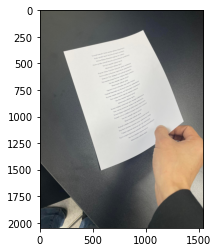

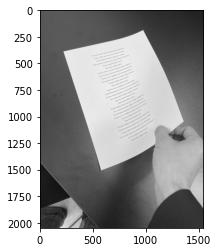

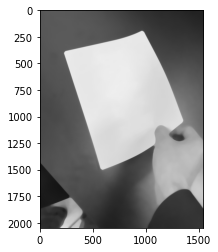

In [16]:
import cv2
#from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import pytesseract
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
#read image
img = cv2.imread('minii_nutag_advanced.jpg')
# get grayscale image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.show()
#noise removal
noise=cv2.medianBlur(gray,37)
plt.imshow(cv2.cvtColor(noise, cv2.COLOR_BGR2RGB))
plt.show()
# thresholding# converting it to binary image by Thresholding
# this step is require if you have colored image because if you skip this part
# then tesseract won’t able to detect text correctly and this will give incorrect #result


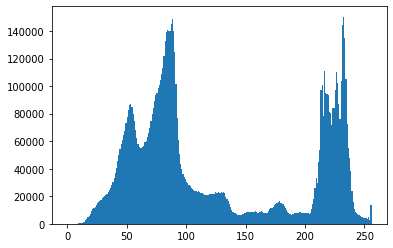

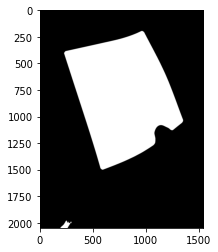

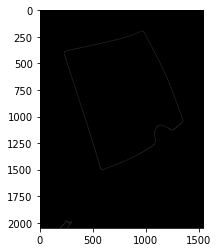

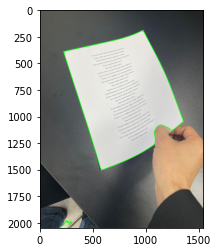

In [17]:
import numpy as np
hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.hist(img.ravel(),256,[0,256]); plt.show()

thresh = cv2.threshold(noise, 204, 255, 0)[1]
edged = cv2.Canny(thresh, 1500, 100)
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#Configuration
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
plt.show()

cv2.drawContours(img, contours, -1, (0, 255, 0), 5)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

config = ('-l mon — oem 3 — psm 3')
# pytessercat
text = pytesseract.image_to_string(thresh,config=config)
print(text)



(4, 2)


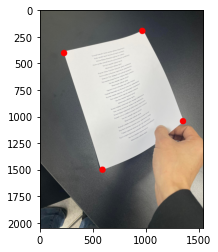

In [19]:
img = cv2.imread('minii_nutag_advanced.jpg')

perim = cv2.arcLength(contours[1], True)
# setting the precision
epsilon = 0.02*perim

approxCorners = cv2.approxPolyDP(contours[1], epsilon, True)
corners = np.array(approxCorners).reshape(4,2)
print(corners.shape)
for point in corners:
  cv2.circle(img, (point[0], point[1]), 30, (0,0,255), -1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

0 1 2 3 - check
0 1 3 2 - check
0 2 1 3 - check
0 2 3 1 - check
0 3 1 2 - check
0 3 2 1 - check

1 0 2 3
1 0 3 2
1 2 0 3
1 2 3 0
1 3 2 0 
1 3 0 2

2 1 3 0
2 1 0 3
2 0 1 3
2 0 3 1
2 3 0 1
2 3 1 0

3 1 0 2
3 1 2 0
3 2 1 0
3 2 0 1
3 0 1 2
3 0 2 1

(1536, 2048, 3)
[[ 225.  404.]
 [ 958.  196.]
 [ 585. 1500.]
 [1339. 1044.]]
[[   0.    0.]
 [1536.    0.]
 [   0. 2048.]
 [1536. 2048.]]


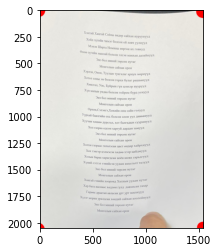

In [36]:
wrapped_img = np.zeros((img.shape[1], img.shape[0], 3))
print(wrapped_img.shape)
dst = np.float32(np.array([[0,0], [wrapped_img.shape[0], 0], [0,wrapped_img.shape[1]], [wrapped_img.shape[0], wrapped_img.shape[1]]]))
src = np.array([corners[1], corners[0], corners[2], corners[3]])
src = np.float32(src)
print(src)
print(dst)

matrix = cv2.getPerspectiveTransform(src, dst)
result = cv2.warpPerspective(img, matrix, (wrapped_img.shape[0], wrapped_img.shape[1]))

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()


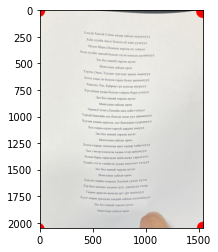

In [37]:
# thresh = cv2.threshold(result, 200, 255, 0)[1]
# edged = cv2.Canny(thresh, 50, 100)
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=result, ddepth=-1, kernel=kernel)
plt.imshow(cv2.cvtColor(image_sharp, cv2.COLOR_BGR2RGB))
cv2.imwrite('minii_nutag_adv_result.jpg', image_sharp)
plt.show()

In [38]:
text = pytesseract.image_to_string(image_sharp,config=config)
print(text)

“Е ВаХсэүвүжэрХүЛлЭ ЭЭ.

Хэнтий Ханг ай Соёны Өндөр сайхан нуруунууд

2207 5 Е
Хойд ЗҮГийн чимэг болсон ой хөвч уулнууд

Мэнэн Шарга Номины өөргөн их говиуд

Өмнө зүгийн манлай болсон элсэн манхан далайнууд

Энэ бол миний төрсөн нутаг

Монголын сайхан орон

Хэрлэн, Онон, Туулын тунгалаг ариун мөрнүүд

Хотол олны ЭМ болсон горхи булаг рашаанууд
Хөвсгөл, Увс, Буйрын гүн цэнхэр нуурууд
Хүн малын ундаа болсон тойром бүрд уснууд

Энэ бол миний төрсөн нутаг
Монголын сайхан орон
Орхон,Сэлэнгэ,Хөхийн онц сайн голууд
Уурхай баялгийн охь болсон олон уул даваанууд
Хуучин хөшөө дурсгал, хот балгадын сууринууд
Хол газраа одсон харгуй дардан замууд
Энэ бол миний төрсөн нутаг
Монголын сайхан орон
Холхи газраас гялалзсан цаст өндөр хайрхнууд
Хөх тэнгэр цэлмэсэн хөдөө хээр цайдмуул
Холын бараа харагдсан ноён шовх сарьдгуул
Хүний сэтгэл тэнийсэн уудам амьсгалт талуУл
Энэ бол миний төрсөн нутаг
Монголын сайхан орон
Хангай говийн хооронд Халхын уудам нута!
Хар бага наснаас хөдлөн гулд давхисан газар
Гөрөө

In [39]:
target_text = """
Хэнтий Хангай Соёны өндөр сайхан нуруунууд
Хойд зүгийн чимэг болсон ой хөвч уулнууд
Мэнэн Шарга Номины өөргөн их говиуд
Өмнө зүгийн манлай болсон элсэн манхан далайнууд
Энэ бол миний төрсөн нутаг
Монголын сайхан орон
Хэрлэн,Онон,Туулын тунгалаг ариун мөрнүүд
Хотол олны эм болсон горхи булаг рашаанууд
Хөвсгөл,Увс,Буйрын гүн цэнхэр нуурууд
Хүн малын ундаа болсон тойром бүрд уснууд
Энэ бол миний төрсөн нутаг
Монголын сайхан орон
Орхон,Сэлэнгэ,Хөхийн онц сайн голууд
Уурхай баялгийн охь болсон олон уул даваанууд
Хуучин хөшөө дурсгал,хот балгадын сууринууд
Хол газраа одсон харгуй дардан замууд
Энэ бол миний төрсөн нутаг
Монголын сайхан орон
Холхи газраас гялалзсан цаст өндөр хайрхнууд
Хөх тэнгэр цэлмэсэн хөдөө хээр цайдмууд
Холын бараа харагдсан ноён шовх сарьдгууд
Хүний сэтгэл тэнийсэн уудам амьсгалт талууд
Энэ бол миний төрсөн нутаг
Монголын сайхан орон
Хангай говийн хооронд Халхын уудам нутаг
Хар бага наснаас хөдлөн гулд  давхисан газар
Гөрөөс араатан авласан урт урт шилнүүд
Хүлэг морин уралдсан хөндий сайхан хоолойнууд
Энэ бол миний төрсөн нутаг
Монголын сайхан орон
"""

In [40]:
target_text1 = target_text.replace("\n", " ")
target_text1 = target_text1.replace(",", " ").lower().split(" ")

In [41]:
text = text.replace("\n", " ")
text = text.replace(",", " ").lower().split(" ")
print(text)

['“е', 'вахсэүвүжэрхүллэ', 'ээ.', '', 'хэнтий', 'ханг', 'ай', 'соёны', 'өндөр', 'сайхан', 'нуруунууд', '', '2207', '5', 'е', 'хойд', 'зүгийн', 'чимэг', 'болсон', 'ой', 'хөвч', 'уулнууд', '', 'мэнэн', 'шарга', 'номины', 'өөргөн', 'их', 'говиуд', '', 'өмнө', 'зүгийн', 'манлай', 'болсон', 'элсэн', 'манхан', 'далайнууд', '', 'энэ', 'бол', 'миний', 'төрсөн', 'нутаг', '', 'монголын', 'сайхан', 'орон', '', 'хэрлэн', '', 'онон', '', 'туулын', 'тунгалаг', 'ариун', 'мөрнүүд', '', 'хотол', 'олны', 'эм', 'болсон', 'горхи', 'булаг', 'рашаанууд', 'хөвсгөл', '', 'увс', '', 'буйрын', 'гүн', 'цэнхэр', 'нуурууд', 'хүн', 'малын', 'ундаа', 'болсон', 'тойром', 'бүрд', 'уснууд', '', 'энэ', 'бол', 'миний', 'төрсөн', 'нутаг', 'монголын', 'сайхан', 'орон', 'орхон', 'сэлэнгэ', 'хөхийн', 'онц', 'сайн', 'голууд', 'уурхай', 'баялгийн', 'охь', 'болсон', 'олон', 'уул', 'даваанууд', 'хуучин', 'хөшөө', 'дурсгал', '', 'хот', 'балгадын', 'сууринууд', 'хол', 'газраа', 'одсон', 'харгуй', 'дардан', 'замууд', 'энэ', 'бол', 

In [42]:
accuracy = len(list(set(target_text1) & set(text))) * 100 / len(set(target_text1))
print("Танилтын хувь: %0.2f%%"%accuracy)

Танилтын хувь: 97.56%


## Даалгавар 1 PerspectiveTransform
1. Зургын чанар хүчжүүлэх
2. Зөвхөн А4 цаасыг дүрслэх 

  https://docs.opencv.org/4.x/dd/d49/tutorial_py_contour_features.html

  https://docs.opencv.org/3.4/d4/d61/tutorial_warp_affine.html 

3. Threshold-ын утгыг тохируулах
4. Алдааг багасгах, Танилтын хувь 100% руу дөхүүлэх. 

## Даалгавар 2
  /content/minii_nutag2.jpg зурагт боловсруулалтыг гүйцэтгэх.

## Даалгавар advanced
  /content/minii_nutag_advanced.jpg зурагт боловсруулалтыг гүйцэтгэх.

## Даалгавар нэмэлт
  Дурын албан бичгээс текст олборлох программ бичих
## Хугацаа 3 долоо хоног
Өөрийн сурж мэдсэн дүгнэлтийг энэхүү Ipynb файлд оруулна уу 500 хүртэлх үгтэй.

# Дүгнэлт

kljhlkjh
